# Foundational Mathematics for AI

# Assignment 4: Classification with SciKit-Learn Library

In this notebook, we will tackle binary and multi-class classification problems with imaging and text data using k-Nearest Neighbors (kNN) algorithm and Naive Bayes' classifier. We will learn how to use the `SciKit-Learn` package for classification problems, which is a popular Python library for machine learning tasks.

## Exercise 1: Iris Flower Classification

We will use the famous Iris dataset to practice multi-class classification using the k-Nearest Neighbors (kNN) algorithm.

1. Load the dataset.
2. Explore the dataset.
3. Split the dataset into training and testing sets.
4. Train a k-Nearest Neighbors classifier.
5. Evaluate the classifier.

SciKit-Learn` is a popular python package containing implementations of many machine learning algorithms, such as the kNN algorithm, which we will learn to use in this notebook.

## Loading datasets



`SciKit-Learn` comes with certain datasets, such as the Iris dataset. Read about this dataset [here](https://archive.ics.uci.edu/dataset/53/iris), and import it into your notebook.

In [32]:
from sklearn.datasets import load_iris

iris = load_iris()  # load the dataset
X = iris.data       # extract feature vectors
y = iris.target     # extract labels

**YOUR TURN**

(a) Explore the Iris dataset. For example, find out:

*   How many features the dataset contains, and what each feature represents
*   How many labels/categories there are, and what they represent
*   How many observations there are in the dataset

(b) Create visualizations of the dataset, such as scatter plots of the feature vectors, colored by its labels.

In [33]:
print(f"The Iris dataset contains {iris.data.shape[1]} features:")
print(f"  - {iris.feature_names[0]}: Represents the length of the sepal.")
print(f"  - {iris.feature_names[1]}: Represents the width of the sepal.")
print(f"  - {iris.feature_names[2]}: Represents the length of the petal.")
print(f"  - {iris.feature_names[3]}: Represents the width of the petal.")

The Iris dataset contains 4 features:
  - sepal length (cm): Represents the length of the sepal.
  - sepal width (cm): Represents the width of the sepal.
  - petal length (cm): Represents the length of the petal.
  - petal width (cm): Represents the width of the petal.


In [34]:
print(f"The Iris dataset contains {len(iris.target_names)} labels:")
print(f"  - {iris.target_names[0]}: Represents the Iris Setosa.")
print(f"  - {iris.target_names[1]}: Represents the Iris Versicolour.")
print(f"  - {iris.target_names[2]}: Represents the Iris Virginica.")

The Iris dataset contains 3 labels:
  - setosa: Represents the Iris Setosa.
  - versicolor: Represents the Iris Versicolour.
  - virginica: Represents the Iris Virginica.


In [35]:
print(f"The Iris dataset contains {iris.data.shape[0]} observations")

The Iris dataset contains 150 observations


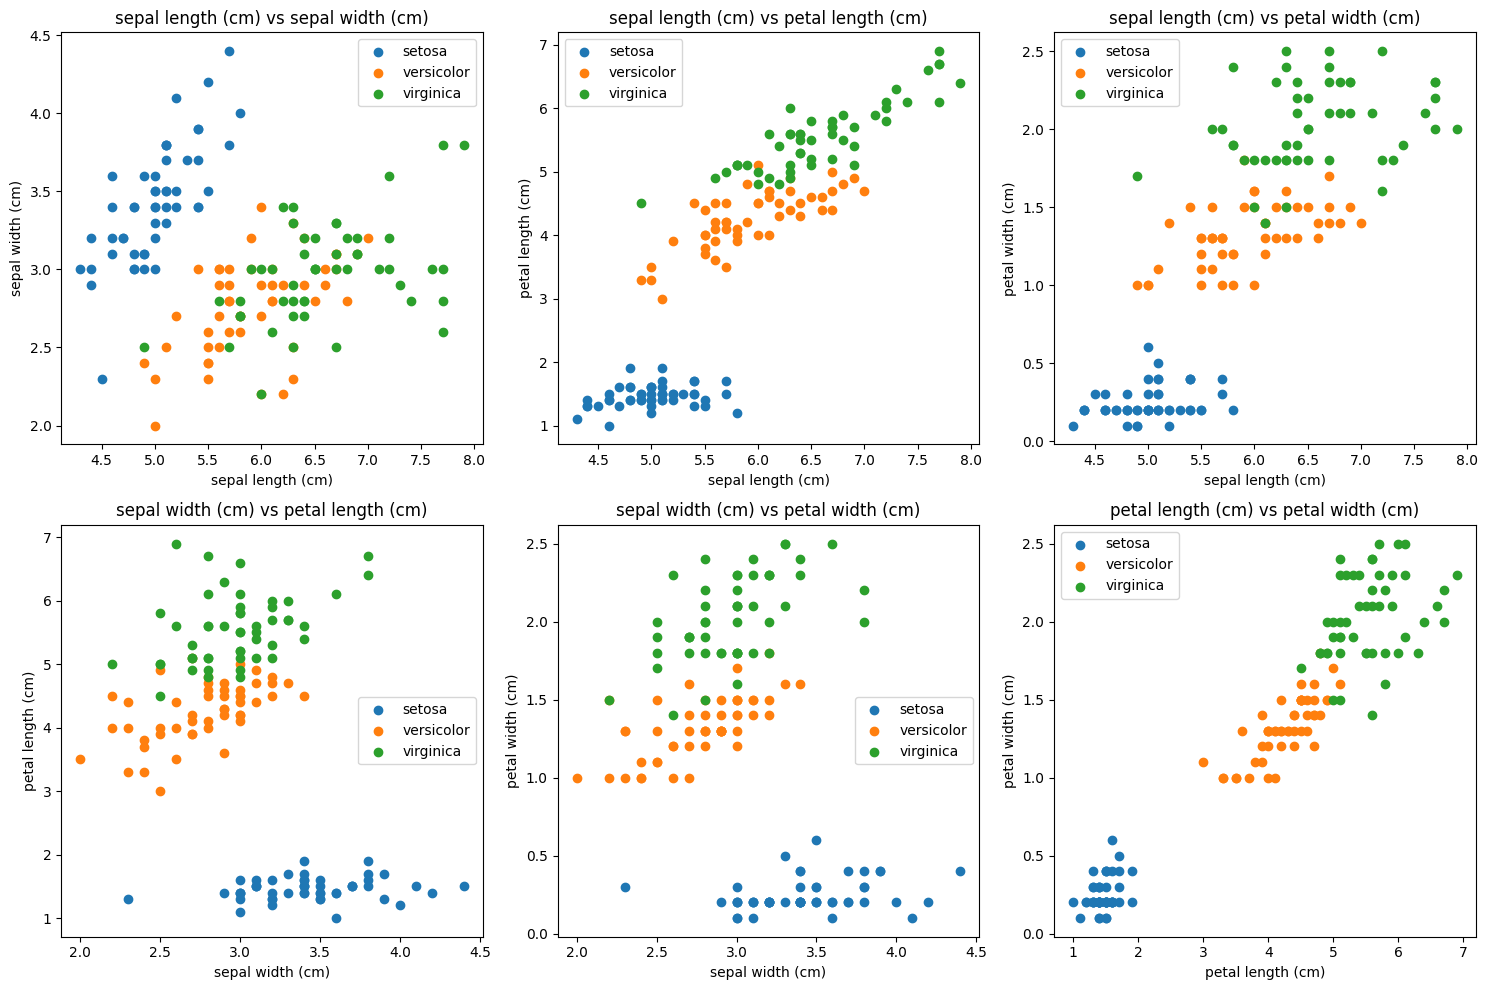

In [36]:
import matplotlib.pyplot as plt

feature_pairs = [(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)]
feature_names = iris.feature_names
target_names = iris.target_names

plt.figure(figsize=(15, 10))

for i, (x_idx, y_idx) in enumerate(feature_pairs):
    plt.subplot(2, 3, i + 1)
    for target_idx, target_name in enumerate(target_names):
        plt.scatter(X[y == target_idx, x_idx], X[y == target_idx, y_idx], label=target_name)

    plt.xlabel(feature_names[x_idx])
    plt.ylabel(feature_names[y_idx])
    plt.title(f'{feature_names[x_idx]} vs {feature_names[y_idx]}')
    plt.legend()

plt.tight_layout()
plt.show()

**YOUR TURN**

We now need to split the dataset into a training and test set in order to train our classifier.

Create a train-test split where 75% of your data is for the training set, and 25% is the test set using the `SciKit-Learn`'s pre-built `train_test_split` method.

You can read about it here:

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

Training set size: 112
Test set size: 38


**YOUR TURN**

`SKLearn` comes with implementations of the kNN classifier, which you can read about via the reference page:

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

Import `SKLearn`'s implementation into your notebook, and use it to train a kNN classifier with $k=3$.

In [38]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

**YOUR TURN**

Use your trained classifier to predict the labels of samples in your test set.

In [39]:
y_pred = knn.predict(X_test)
print(y_pred)
print(y_test)

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]


**YOUR TURN**

Evaluate the performance of your classifier by computing it's:

(i) Accuracy

(ii) Precision

(iii) Recall

Display the confusion matrix as well.

Interpret your results.

You may use `SKLearn`'s pre-built tools to compute these performance metrics:

https://scikit-learn.org/stable/api/sklearn.metrics.html#module-sklearn.metrics

In [40]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import seaborn as sns
import pandas as pd

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')

performance_metrics = {
    'Metric': ['Accuracy', 'Precision', 'Recall'],
    'Score': [accuracy, precision, recall]
}

df_performance = pd.DataFrame(performance_metrics)
df_performance.head()

,Metric,Score
0,Accuracy,1.0
1,Precision,1.0
2,Recall,1.0


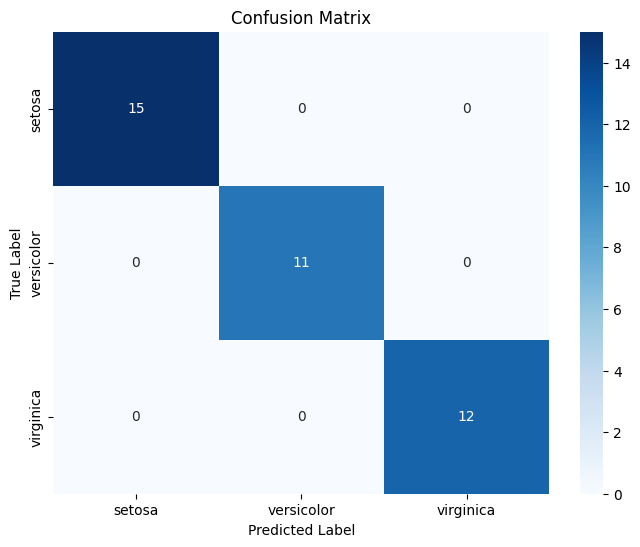

In [41]:
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

### Interpretation

The accuracy of the kNN classifier with k=3 on the test set is 1.00.This means that 100% of the test samples were classified correctly.

The average precision across all classes is 1.00. Precision measures the ability of the classifier not to label as positive a sample that is negative. A higher precision indicates fewer false positives.

The average recall across all classes is 1.00. Recall measures the ability of the classifier to find all the positive samples. A higher recall indicates fewer false negatives.

The confusion matrix shows the number of correct and incorrect predictions for each class.
Rows represent the true labels, and columns represent the predicted labels. For example, the value in row i and column j is the number of samples that are truly in class i but were predicted to be in class j.

The diagonal elements of the confusion matrix represent the number of correct predictions for each class.Off-diagonal elements represent misclassifications.

**YOUR TURN**

Try changing the value of k (over a large range of values) in the kNN algorithm and observe the impact on the accuracy.

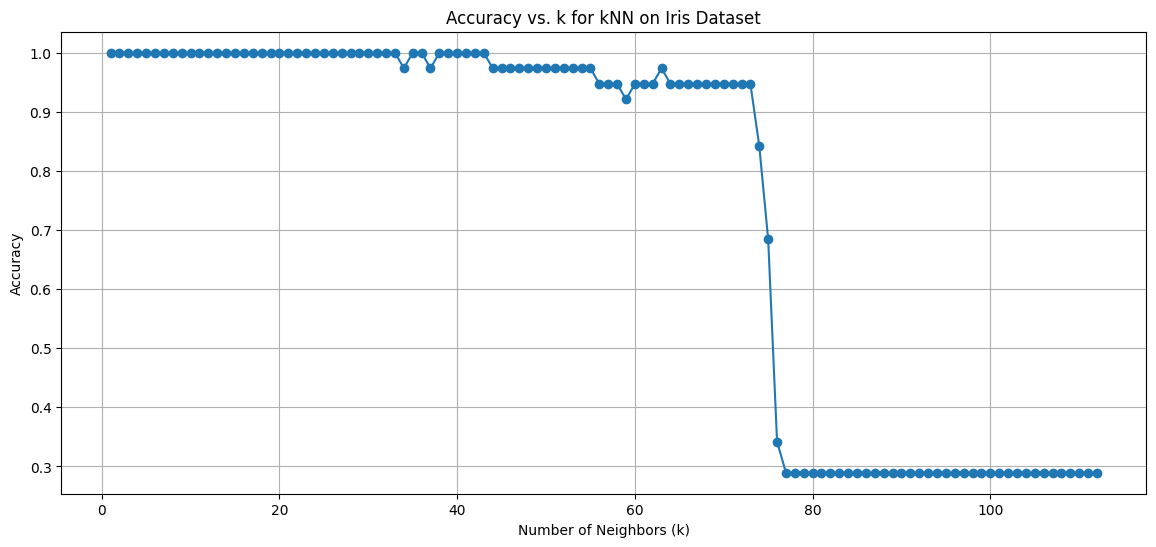

In [42]:
k_values = range(1, 113)
accuracy_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    new_accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(new_accuracy)

plt.figure(figsize=(14, 6))
plt.plot(k_values, accuracy_scores, marker='o', linestyle='-')
plt.title('Accuracy vs. k for kNN on Iris Dataset')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

**YOUR TURN**

Implement a different classifier (e.g., Naive Bayes' classifier or Decision Tree) and compare its performance with kNN on the Iris dataset.

You can read the lecture notes to learn about the Naive Bayes' classifier.

Here are some implementations of these classifiers in `SKLearn` here:



*   Naive Bayes': https://scikit-learn.org/stable/modules/naive_bayes.html
*   Decision Trees: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier



In [43]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

accuracy_nb = accuracy_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb, average='macro')
recall_nb = recall_score(y_test, y_pred_nb, average='macro')

performance_metrics = {
    'Metric': ['Accuracy', 'Precision', 'Recall'],
    'Score': [accuracy, precision, recall]
}

df_performance = pd.DataFrame(performance_metrics)
df_performance.head()

,Metric,Score
0,Accuracy,1.0
1,Precision,1.0
2,Recall,1.0


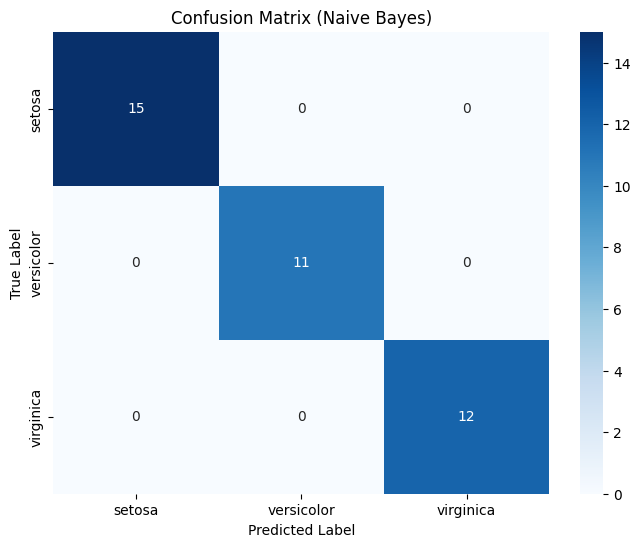

In [44]:
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_nb, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (Naive Bayes)')
plt.show()

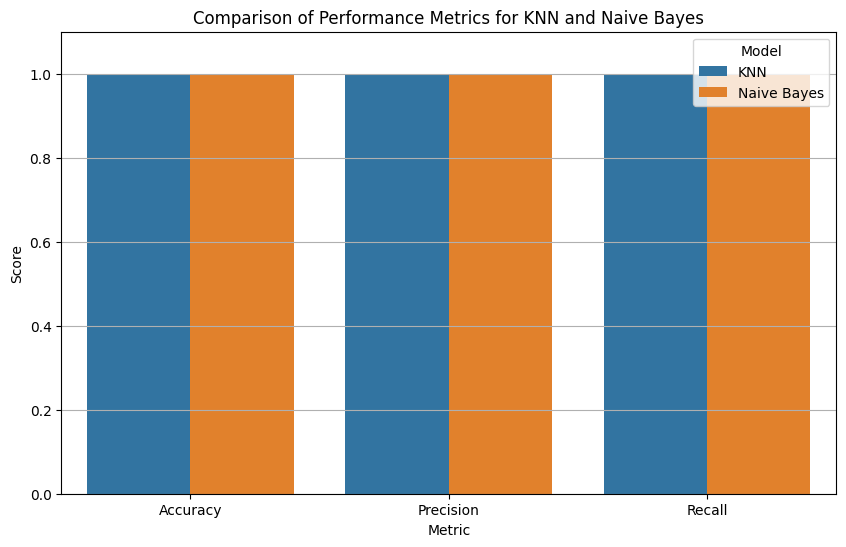

In [45]:
knn_performance = {
    'Metric': ['Accuracy', 'Precision', 'Recall'],
    'Score': [accuracy, precision, recall],
    'Model': ['KNN', 'KNN', 'KNN']
}

nb_performance = {
    'Metric': ['Accuracy', 'Precision', 'Recall'],
    'Score': [accuracy_nb, precision_nb, recall_nb],
    'Model': ['Naive Bayes', 'Naive Bayes', 'Naive Bayes']
}

df_knn = pd.DataFrame(knn_performance)
df_nb = pd.DataFrame(nb_performance)

df_comparison = pd.concat([df_knn, df_nb])

plt.figure(figsize=(10, 6))
sns.barplot(x='Metric', y='Score', hue='Model', data=df_comparison)
plt.title('Comparison of Performance Metrics for KNN and Naive Bayes')
plt.ylabel('Score')
plt.ylim(0, 1.1)
plt.grid(axis='y')
plt.show()

### Comparison
Both models achieved high accuracy, precision, and recall scores, indicating their effectiveness in classifying the Iris flower species.

### Exercise 2: Distance Calculation

We will practice calculating different distance metrics used in k-Nearest Neighbors.

1. Implement functions to calculate Euclidean, Manhattan, and Minkowski distances from the lecture notes.
2. Calculate all pairwise distance between the first two feature vectors of your training set points using these functions.
3. Compare your results.

It will be useful to use the `numpy` library to define your distance functions.

In [46]:
import numpy as np

def euclidean_distance(v1, v2):
    return np.sqrt(np.sum((v1 - v2)**2))

def manhattan_distance(v1, v2):
    return np.sum(np.abs(v1 - v2))

def minkowski_distance(v1, v2, p):
    return np.sum(np.abs(v1 - v2)**p)**(1/p)

vector1 = X_train[0]
vector2 = X_train[1]

dist_euclidean = euclidean_distance(vector1, vector2)
dist_manhattan = manhattan_distance(vector1, vector2)
dist_minkowski_p3 = minkowski_distance(vector1, vector2, p=3)

print(f"Euclidean Distance between vector 1 and 2: {dist_euclidean:.3f}")
print(f"Manhattan Distance between vector 1 and 2: {dist_manhattan:.3f}")
print(f"Minkowski Distance (p=3) between vector 1 and 2: {dist_minkowski_p3:.3f}")

Euclidean Distance between vector 1 and 2: 0.557
Manhattan Distance between vector 1 and 2: 0.900
Minkowski Distance (p=3) between vector 1 and 2: 0.513


Manhattan distance is always greater than or equal to Euclidean distance.

Minkowski distance with p=1 is Manhattan distance, and with p=2 is Euclidean distance. For p > 2, Minkowski distance will be less than or equal to Euclidean distance